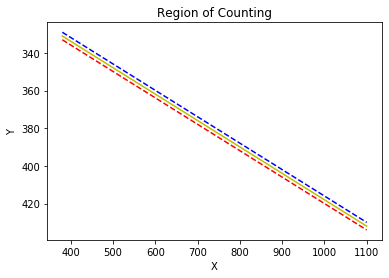

In [16]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

camera=cv2.VideoCapture('8.mp4')
cars_classifier=cv2.CascadeClassifier('Cascades/car_800.xml')
tracker =cv2.TrackerMedianFlow_create()
multiTracker = cv2.MultiTracker_create()
onTracking = False
count_bi =0
count_ca =0
id_ca=0
while(True):
    
    #จับภาพ frame ต่อ frame
    ret,img=camera.read()
    
    #Stop Video!! when end video
    if(type(img)==type(None)):
        break
    
    height,width=img.shape[0:2]
    
    cv2.putText(img,'CAR COUNT:',(10,80),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)
    
    ############### Parameter of Counting Line
    #Starting point
    x_str = 380
    y_str = int(height*2.3/5)
    #Ending point
    x_end = 1100
    y_end = int(height*3/5)
    #Acceptable gap
    gap = 2 
    
    starting_point = (x_str,y_str)
    ending_point   = (x_end,y_end)
    cv2.line(img,starting_point,ending_point,(255,255,255),2)
    
    #Slop of Region Line
    slope = (y_end-y_str)/(x_end-x_str)

    #For plot Region of counting in matplotlib
    xx = np.linspace(x_str,x_end,100,endpoint = True)
    y_any_plot = slope*xx+(y_str-slope*xx[0])
    y_any_gp_plot = y_any_plot+gap
    y_any_gn_plot = y_any_plot-gap
            
    
    if not onTracking:
        #blur=cv2.blur(img,(3,3))
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        cars=cars_classifier.detectMultiScale(gray,scaleFactor=1.4,minNeighbors=3)
        for (x,y,w,h) in cars:
            #######################Counting Value#####################
            #For count vehicle in program
            y_any = slope*x+(y_str-slope*x_str)
            y_any_gp = y_any+gap
            y_any_gn = y_any-gap
            ######################ID of Detection#####################
            id_ca = id_ca+1

            carsCy=(y+h/2)
            
            if(carsCy<y_any_gp and carsCy>y_any_gn):

                count_ca=count_ca+1
                cv2.line(img,starting_point,ending_point,(0,0,255),5)
            
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(img,'Car',(int(x+15),y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
            cv2.putText(img,str(id_ca),(int(x+15),y+30),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
            cv2.putText(img,str(count_ca),(280,80),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)
            
            if tracker.init(img, (x,y,w,h)):
                onTracking = True
    else: 
        ok, bbox = multiTracker.update(img)
        for i, newbox in enumerate(bbox):
            p1 = (int(newbox[0]), int(newbox[1]))
            p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
            cv2.rectangle(frame, p1, p2, (0,0,255), 2, 1)

        else:
            onTracking = False
            multiTracker = cv2.MultiTracker_create()
            
    cv2.imshow("J",img)
    key=cv2.waitKey(1)
    
    if key==27:
        break

plt.plot(xx,y_any_plot,"y",xx,y_any_gp_plot,'--r',xx,y_any_gn_plot,'--b')
plt.gca().invert_yaxis()
plt.title("Region of Counting")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

cv2.destroyAllWindows()
camera.release()